In [1]:
import numpy as np
import pandas as pd

#### Character Stats

In [2]:
class Bishop:
    mag_atk = 28038
    mag_atk_increase = 1.3220
    mag_dmg_increase = 0.288
    boss_atk = 0.66
    crit_dmg = 3.535
    final_dmg_increase = 0.063
    
    # hyperstat
    hyper_ad = 0
    hyper_md = 0
    
    def __init__(self, hyper_ad=0, hyper_md=0):

        # mag atk buff
        use_squid = False
        use_grape_juice = True

        # mag dmg buff
        use_escargot = True # stack
        use_candy_cane = True

        # crit dmg buff
        use_chestnut = True

        # mag atk buff
        use_squid = False
        use_grape_juice = True

        # boss atk buff
        use_cold_jelly = True # stack
        use_chick_cookie = False
        use_shrimp = True
        use_boss_rush = False

        # calculate buffed stats
        self.mag_atk_increase += max(use_squid * 0.3, use_grape_juice * 0.5)
        self.mag_dmg_increase += use_escargot * 0.2 + use_candy_cane * 0.3
        self.boss_atk += use_cold_jelly * 0.2 + max(use_chick_cookie * 0.3, use_shrimp * 0.5) + use_boss_rush * 0.5
        self.crit_dmg += use_chestnut * 0.3
        self.final_dmg_increase = 0.063
        
        
        self.hyper_md = hyper_md
        self.hyper_ad = hyper_ad
        self.mag_dmg_increase += self.hyper_mag_dmg_increase
        
        
    @property
    def hyper_additional_dmg_activation(self):
        return pd.read_csv("./assets/hyper_ad.csv", index_col="level").loc[self.hyper_ad].act_chance
    
    @property
    def hyper_additional_dmg(self):
        return pd.read_csv("./assets/hyper_ad.csv", index_col="level").loc[self.hyper_ad].skill_cmg

    @property
    def hyper_mag_dmg_increase(self):
        return pd.read_csv("./assets/hyper_md.csv", index_col="level").loc[self.hyper_md].md_increase
    
    def angel_ray(self, cast=1, single_target=False):
        
        if single_target:
            target = 1
            hit = 13
            skill_dmg = 1.96
        else:
            target = 7
            hit = 8
            skill_dmg = 1.755
        lines = target * hit * cast
        
        # angel ray attack
        base_atk = self.mag_atk * skill_dmg * (1 + self.mag_dmg_increase) * (1 + self.final_dmg_increase)
        normal_atk = base_atk * (1 + self.mag_atk_increase)
        crit_atk = normal_atk * (1.2 + self.crit_dmg)
        boss_atk = base_atk * (1 + self.mag_atk_increase + skill_dmg * self.boss_atk)
        boss_crit = boss_atk * (1.2 + self.crit_dmg)
        
        # additional attack
        add_lines = lines * self.hyper_additional_dmg_activation
        add_base_atk = self.mag_atk * self.hyper_additional_dmg * (1 + self.mag_dmg_increase) * (1 + self.final_dmg_increase)
        add_normal_atk = add_base_atk * (1 + self.mag_atk_increase)
        add_crit_atk = add_normal_atk * (1.2 + self.crit_dmg)
        add_boss_atk = add_base_atk * (1 + self.mag_atk_increase + self.hyper_additional_dmg * self.boss_atk)
        add_boss_crit = add_boss_atk * (1.2 + self.crit_dmg)
    
        return {
            "normal_atk": normal_atk * lines + add_normal_atk * add_lines,
            "crit_atk": crit_atk * lines + add_crit_atk * add_lines,
            "boss_atk": boss_atk * lines + add_boss_atk * add_lines,
            "boss_crit": boss_crit * lines + add_boss_crit * add_lines
        }
    
    def __str__(self):
        return f"""
Buffed stats:
MAG ATK \t{self.mag_atk}
MA Increase \t{round(self.mag_atk_increase * 100, 2)}%
MD Increase \t{round(self.mag_dmg_increase * 100, 2)}%
BA Increase \t{round(self.boss_atk * 100, 2)}%
Crit DMG \t{round(self.crit_dmg * 100, 2)}%
FD Increase \t{round(self.final_dmg_increase * 100, 2)}%
        """
    

In [3]:
bishop = Bishop(hyper_md=20)
print(bishop)

bishop.angel_ray(cast=10, single_target=True)


Buffed stats:
MAG ATK 	28038
MA Increase 	182.2%
MD Increase 	98.8%
BA Increase 	136.0%
Crit DMG 	383.5%
FD Increase 	6.3%
        


{'normal_atk': 42604268.1123364,
 'crit_atk': 214512489.94561377,
 'boss_atk': 82847335.8232662,
 'boss_crit': 417136335.87014526}

In [4]:
normal_atk = np.zeros(21)
crit_atk = np.zeros(21)
boss_atk = np.zeros(21)
boss_crit = np.zeros(21)

In [5]:
for hyper_ad in range(21):
    hyper_md = 20 - hyper_ad
    bishop = Bishop(hyper_ad=hyper_ad, hyper_md=hyper_md)
    atk = bishop.angel_ray(cast=100, single_target=True)
    
    normal_atk[hyper_ad] = atk["normal_atk"]
    crit_atk[hyper_ad] = atk["crit_atk"]
    boss_atk[hyper_ad] = atk["boss_atk"]
    boss_crit[hyper_ad] = atk["boss_crit"]

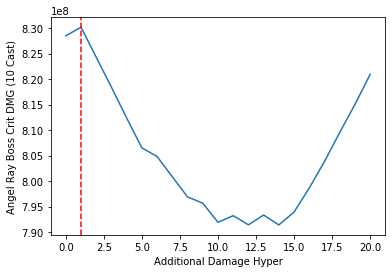

In [6]:
from matplotlib import pyplot as plt
plt.plot(boss_atk)
plt.xlabel("Additional Damage Hyper")
plt.ylabel("Angel Ray Boss Crit DMG (10 Cast)")
plt.axvline(1, linestyle="--", color='r')

In [7]:
bishop = Bishop(hyper_ad=20, hyper_md=0)
bishop.angel_ray(cast=10, single_target=True)

{'normal_atk': 42716888.72415965,
 'crit_atk': 215079534.72614384,
 'boss_atk': 82091187.67751314,
 'boss_crit': 413329129.9562787}

In [8]:
bishop = Bishop(hyper_ad=0, hyper_md=20)
bishop.angel_ray(cast=10, single_target=True)

{'normal_atk': 42604268.1123364,
 'crit_atk': 214512489.94561377,
 'boss_atk': 82847335.8232662,
 'boss_crit': 417136335.87014526}